In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.datasets import load_wine

In [4]:
# Load the Wine Quality Dataset from sklearn
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target column for classification

In [5]:
# Display basic info
display(df.head())
display(df.info())
display(df.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

None

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
# Key Features & Importance
# 1. Alcohol: Higher alcohol content improves wine quality.
# 2. Malic Acid: Affects wine's acidity and sharpness.
# 3. Ash: Indicates mineral content, impacting texture.
# 4. Alcalinity of Ash: Influences pH balance and stability.
# 5. Magnesium: Essential for fermentation and taste.
# 6. Total Phenols: Contributes to antioxidants and tannins.
# 7. Flavanoids: Enhances color and taste complexity.
# 8. Non-Flavanoid Phenols: Influences bitterness.
# 9. Proanthocyanins: Stabilizes wine color.
# 10. Color Intensity: Richer color is linked to higher quality.
# 11. Hue: Affects wine’s visual appeal.
# 12. OD280/OD315: Measures tannins and structure.
# 13. Proline: Correlates with sweetness and aroma.

In [8]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [ ]:
# Handling Missing Data

# Mean Imputation: Replaces missing values with column mean (used here).
#   Advantage: Simple and fast.
#   Disadvantage: Can distort variance if many values are missing.
# Median Imputation: Replaces missing values with column median.
#   Advantage: Works well for skewed data.
#   Disadvantage: Can ignore underlying data patterns.
# Mode Imputation: Uses the most frequent value.
#   Advantage: Useful for categorical data.
#   Disadvantage: Can introduce bias if one value dominates.
# Predictive Imputation: Uses models to estimate missing values.
#   Advantage: More accurate.
#   Disadvantage: Computationally expensive.

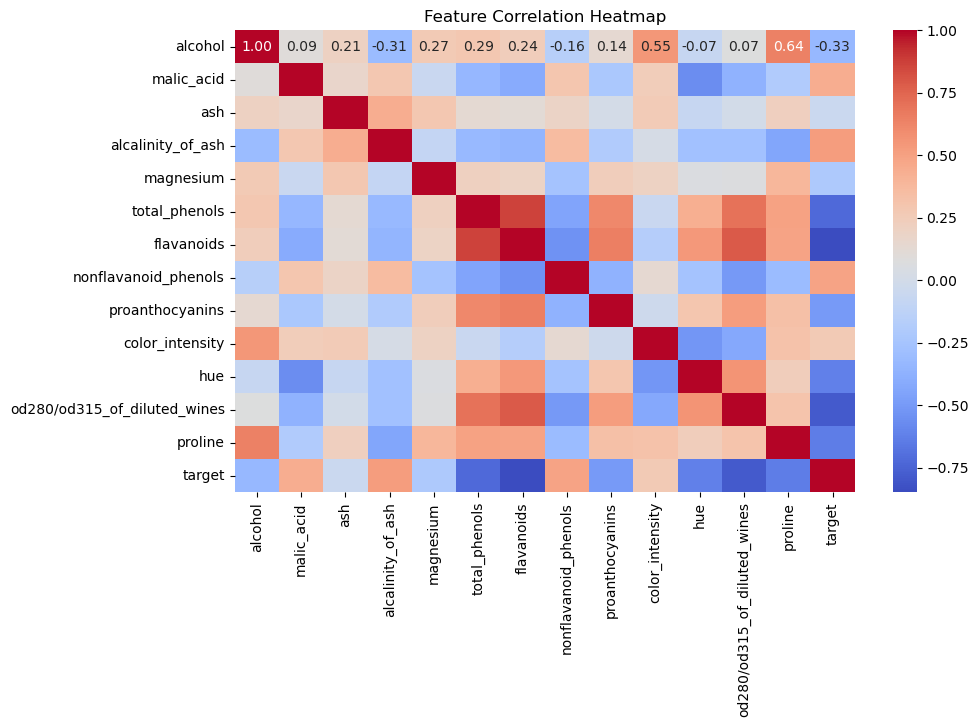

In [10]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

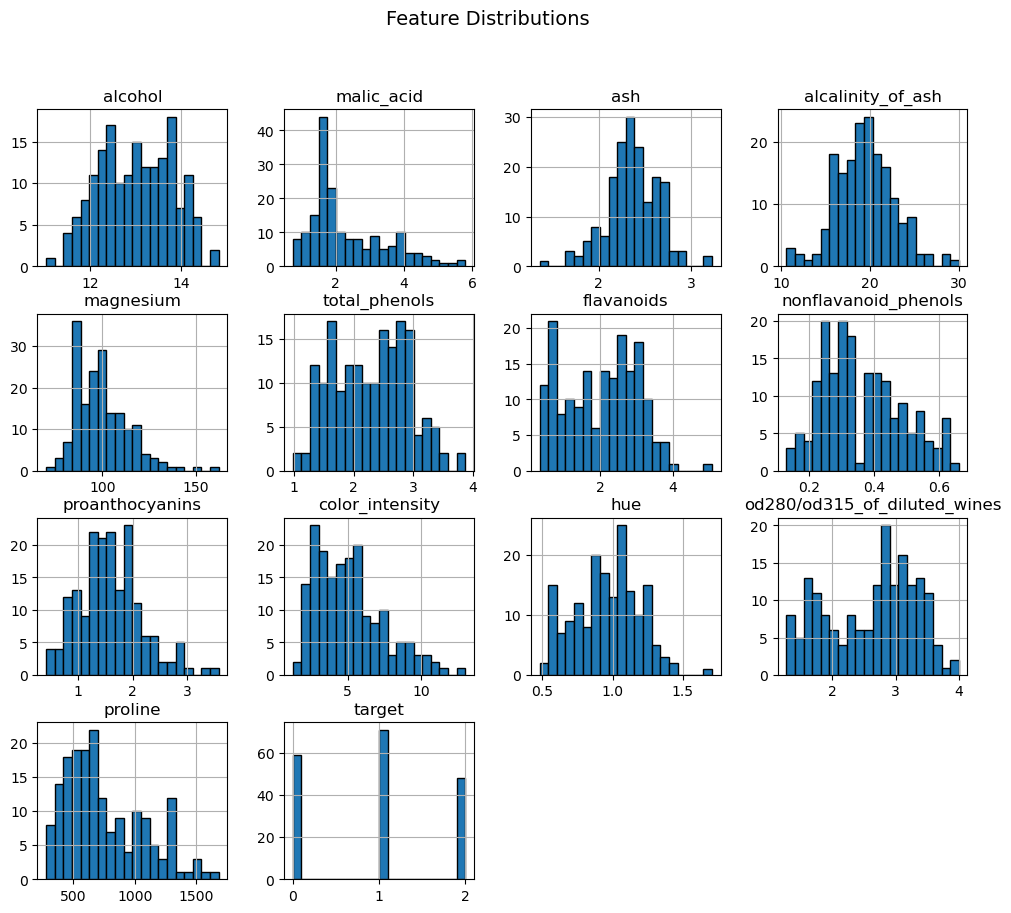

In [11]:
# Histogram of Features
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

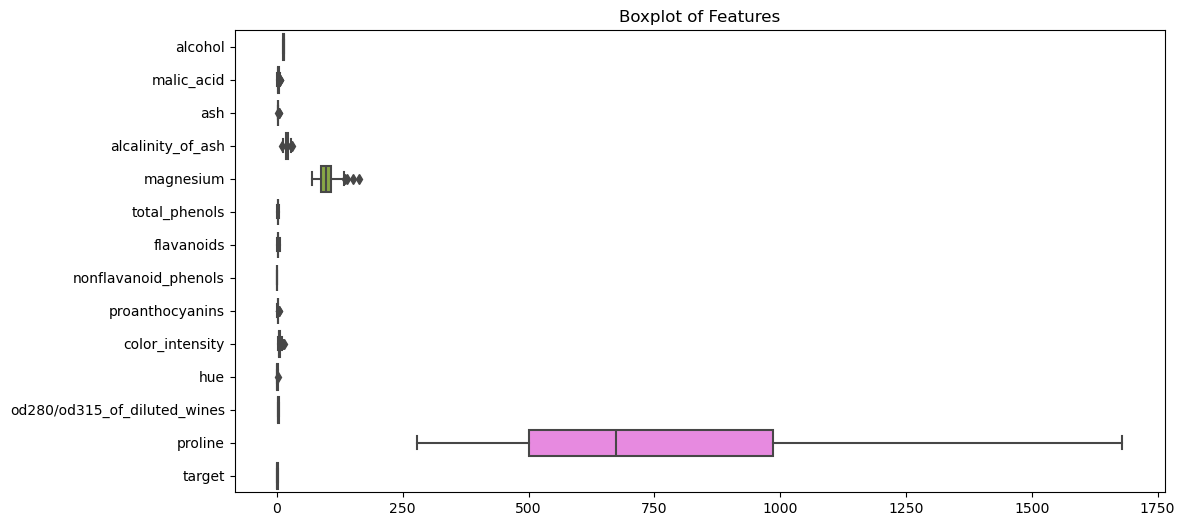

In [12]:
# Boxplots to check outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')
plt.title("Boxplot of Features")
plt.show()


In [13]:
# Identify Non-Normal Features
skewness = df.skew()
skewed_features = skewness[abs(skewness) > 1].index
print("Skewed Features:", list(skewed_features))

Skewed Features: ['malic_acid', 'magnesium']


In [14]:
# Apply Box-Cox Transformation to Skewed Features
for feature in skewed_features:
    df[feature], _ = boxcox(df[feature] + 1)

In [15]:
# Recheck Skewness after Transformation
print("Post-Transformation Skewness:")
print(df[skewed_features].skew())

Post-Transformation Skewness:
malic_acid    0.073007
magnesium     0.006540
dtype: float64
